# Simulações em Mecânica Quântica

**Referências**: 

[Pythonic Perambulations](https://jakevdp.github.io/blog/2012/09/05/quantum-python/)

[Algorithm Arquive](https://www.algorithm-archive.org/contents/split-operator_method/split-operator_method.html)

## Split-Step Fourier (Split-Operator) Method :
**Numa tradução livre: "Método da Separação Operadores"

Como vimos na aula anterior, a equação que rege a dinâmica de corpos na mecânica quântica é a Equação de Schrödinger (ES):

$$ i\hbar\frac{\partial \psi}{\partial t} = \hat{H} \psi $$

Estaremos, no entanto mais interessados no  caso em que $H = \hat{T} + \hat{V}$

$$ i\hbar\frac{\partial \psi}{\partial t}= -\frac{\hbar^2}{2m}\nabla^2 \psi + V(\vec{r}) \psi   $$

Com o intuito de simplificar, atacaremos o problema unidimensional: 

$$ i\hbar\frac{\partial \psi}{\partial t}= -\frac{\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2} + V(\vec{r}) \psi   $$

* Um dos jeitos de se solucionar algumas equações diferenciais é por meio do uso da transformada de Fourier. 

* Usando a convenção em que a transformada de $\psi(x,t)$ é dada por

    $$\tilde{\psi}(k,t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \psi(x,t) e^{-ikx} dx $$
    
* A transformada inversa fica:

    $$\psi(x,t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \tilde{\psi}(k,t) e^{+ikx} dk $$

* Substituindo na E.S. e simplificando chega-se à eq. de Schrödinger no espaço dos momentos (espaço-k):

$$
i\hbar\frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2}
+ V(\vec{r})\psi ~~~~ \rightarrow ~~~~\text{no espaço de posições}
$$

$$ 
   i\hbar\frac{\partial \tilde{\psi}}{\partial t} =
   \frac{\hbar^2 k_x^2}{2m}\tilde{\psi} + V\left(i\frac{\partial}{\partial k_x}\right) \tilde{\psi}
   ~~~~ \rightarrow ~~~~\text{no espaço de momentos}
$$
   
* Note que existe uma simetria interessante na E. S.:
    * Temos (nas duas representações) um fator multiplicativo; e
    * outro termo mais complicado envolvendo uma derivada de algum tipo. 

## Fórmula de Baker - Campbell - Hausdorff

* Voltemos a formulação mais geral:

$$ i\hbar\frac{\partial \psi}{\partial t} = \hat{H} \psi $$

* Podemos *resolver* de maneira formal tal equação escrevendo

$$ \psi(x,t) = e^ {\frac{-it\hat{H}}{\hbar}} \psi(x, 0) $$

* Interpretamos a exponencial de um operador da seguinte maneira:

$$\exp\left[ \frac{-it\hat{H}}{\hbar} \right] \psi = \left(1 -\frac{it\hat{H}}{\hbar} 
- \frac{t^2 \hat{H}\cdot \hat{H}}{2\hbar} + \cdots \right) \psi$$

* Por mais correto que seja, a expressão acima não é muito útil;

* Vamos aproximar usando a chamada fórmula de Baker - Campbell - Hausdorff:

    $$ \psi(\vec{r},t+dt) = \left[ e^{-iH_rdt/\hbar} e^{-iH_kdt/\hbar} e^{-iH_rdt/\hbar}\right] \psi(\vec{r},t) + \mathcal{O}(dt^2) $$
    
* Separação (Spliting) de Strang:

$$ \psi(\vec{r},t+dt) = \left[ e^{-iH_rdt/2\hbar} e^{-iH_kdt/\hbar} e^{-iH_rdt/2\hbar}\right] \psi(\vec{r},t) + \mathcal{O}(dt^3) $$


### Implementação:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift, ifft

In [2]:
def gauss(x, sigma, x0, k0):
    '''
    Função para gerar um pacote de ondas Gaussiano centrado
    em 'x0', de largura 'sigma' e momento médio hbar*k0.
    '''
    C = (sigma * np.sqrt(np.pi)) ** (-0.5)
    gaussian = C * np.exp(-0.5*((x-x0) * 1./sigma)**2  
                      + 1j * x * k0)
    return gaussian

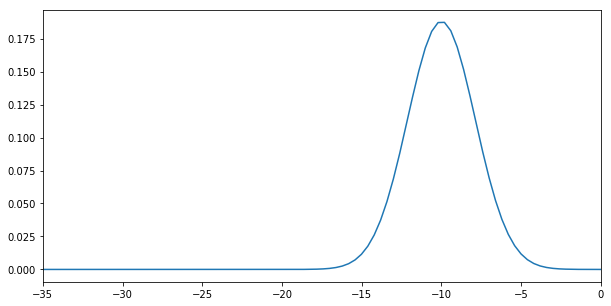

In [18]:
"""
Vamos gerar nossa condição inicial e verificar se 
o resultado é o que esperamos.
"""

x_i = -200. # Limite inferior do espaço 1D
x_f =  200. # Limite superior do espaço 1D
N   = 10**3 # Qantidade de pontos do espaço discretizado

x_array = np.linspace(x_i, x_f, N) # discretização
dx = x_array[1] - x_array[0]

# FFTSHIFT, "frequencia" de Nyquist :
k_array = fftshift(np.linspace(-1, 1, N) * np.pi/dx) 

# Definição da cond. inicial.
sigma  = 3.
x0 = -10.
k0 = 2.
psi_0 = gauss(x_array, sigma, x0, k0)

plt.figure(figsize=(10,5))
plt.plot(x_array, abs(psi_0)**2)
plt.xlim((-35,0))
plt.show()

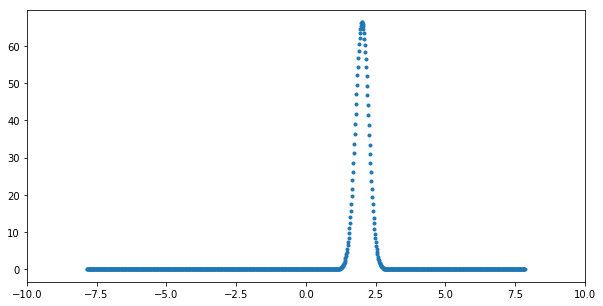

In [19]:
psi_k = fft(psi_0)

plt.figure(figsize=(10,5))
plt.plot(k_array, abs(psi_k)**2,'.')
plt.xlim((-10,10))
plt.show()

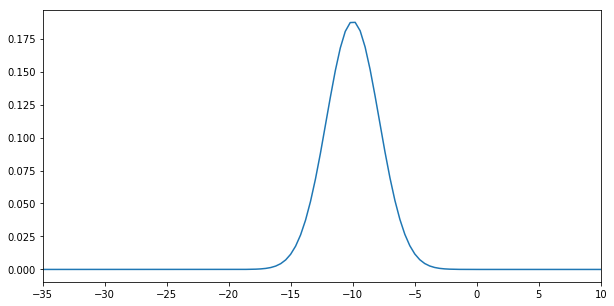

In [20]:
psi_refeito = ifft(psi_k)

plt.figure(figsize=(10,5))
plt.plot(x_array, abs(psi_refeito)**2)
plt.xlim((-35,10))
plt.show()

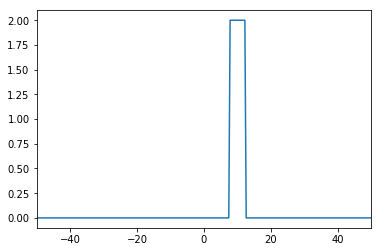

In [46]:
def V_barreira(x, x1=10, b=5, V_0=2.0):
    if abs(x-x1) < b/2.:
        return V_0
    else:
        return 0
    
V_bar = np.array([V_barreira(x) for x in x_array])

plt.plot(x_array, V_bar)
plt.xlim((-50,50))
plt.show()

In [47]:
def calc_energia(k0,hbar,m):
    return 0.5 * (hbar * k0)**2/m

print(calc_energia(5,1,1))

12.5


In [48]:
def evolui_x(psi_x, V_array, dt):
    psi_x_t = psi_x * np.exp(- 1j * (0.5 * dt) * V_array)
    return psi_x_t

def evolui_k(psi_k, k_array, dt):
    psi_k_t = psi_k * np.exp(- 1j * dt * (0.5 * k_array**2))
    return psi_k_t

def evolui_t(psi_x, x_array, k_array, V_array, t, N_t):
    
    t_array = np.linspace(0, t, N_t)
    dt = t_array[1] - t_array[0]
    
    for i in range(N_t):
        psi_x = evolui_x(psi_x, V_array, dt)
        psi_k = fft(psi_x)
        psi_k = evolui_k(psi_k, k_array, dt)
        psi_x = ifft(psi_k)
        psi_x = evolui_x(psi_x, V_array, dt)
    return psi_x

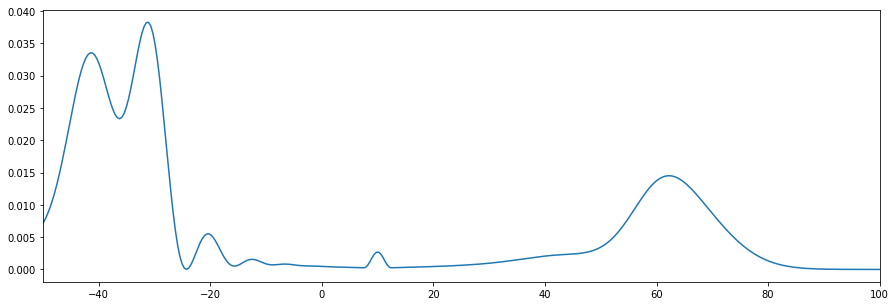

In [49]:
t = 35
N = 500
psi_x_t = evolui_t(psi_0, x_array, k_array, V_bar, t, N)

plt.figure(figsize=(15,5))
plt.plot(x_array, abs(psi_x_t)**2)
plt.xlim((-50,100))
plt.show()

In [50]:
def evolui_t_matrix(psi_x, x_array, k_array, V_array, t, N_t):

    N_x = len(psi_x)
    matrix = np.full((N_x, N_t), np.nan)
    matrix[:,0] = abs(psi_x)**2
    
    t_array = np.linspace(0, t, N_t)
    dt = t_array[1] - t_array[0]
    
    for i in range(N_t-1):
        psi_x = evolui_x(psi_x, V_array, dt)
        psi_k = fft(psi_x)
        psi_k = evolui_k(psi_k, k_array, dt)
        psi_x = ifft(psi_k)
        psi_x = evolui_x(psi_x, V_array, dt)
        matrix[:,i+1] = abs(psi_x)**2
    return psi_x, matrix

In [51]:
t_f = 25
N_t = 500
psi_x_t, M = evolui_t_matrix(psi_0, x_array, k_array,V_bar, t_f, N_t)
t_array = np.linspace(0, t_f, N_t)

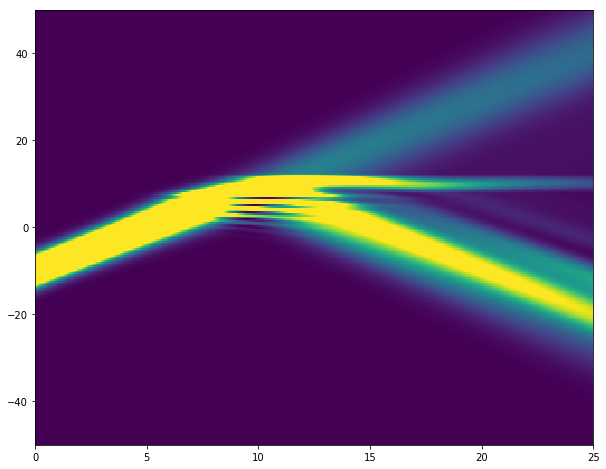

In [52]:
X, Y = np.meshgrid(t_array, x_array)
plt.figure(figsize=(10,8))
plt.pcolormesh(X,Y,M, vmax=0.05)
plt.ylim((-50,50))
# plt.plot(x_array, abs(psi_x_t)**2)
plt.show()